In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import socket, struct
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', 500)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
%pip install pyarrow
%pip install fastparquet

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
dt = pd.read_parquet('merged_dataset.gzip')

In [3]:
print("This dataset has {} columns and {} rows".format(dt.shape[1],dt.shape[0]))

This dataset has 25 columns and 5001358 rows


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001358 entries, 0 to 1330691
Data columns (total 25 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   IPV4_SRC_ADDR               object
 1   L4_SRC_PORT                 int64 
 2   IPV4_DST_ADDR               object
 3   L4_DST_PORT                 int64 
 4   PROTOCOL                    int64 
 5   IN_BYTES                    int64 
 6   IN_PKTS                     int64 
 7   OUT_BYTES                   int64 
 8   OUT_PKTS                    int64 
 9   TCP_FLAGS                   int64 
 10  FLOW_DURATION_MILLISECONDS  int64 
 11  MIN_IP_PKT_LEN              int64 
 12  MAX_IP_PKT_LEN              int64 
 13  SRC_TO_DST_SECOND_BYTES     object
 14  DST_TO_SRC_SECOND_BYTES     object
 15  RETRANSMITTED_IN_BYTES      int64 
 16  RETRANSMITTED_IN_PKTS       int64 
 17  RETRANSMITTED_OUT_BYTES     int64 
 18  RETRANSMITTED_OUT_PKTS      int64 
 19  TCP_WIN_MAX_IN              int64 
 20  TCP_WIN

In [5]:
dt.head(3)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,Label,Attack,L7_PROTO_NAME,PROTOCOL_MAP
0,192.168.100.148,65389,192.168.100.7,80,6,420,3,0,0,2,4293092,0,140,140280.0,0.0,140,1,0,0,512,0,1,DoS,CBT,tcp
1,192.168.100.148,11154,192.168.100.5,80,6,280,2,40,1,22,4294499,40,140,280.0,40.0,0,0,0,0,512,0,1,DoS,CBT,tcp
2,192.168.1.31,42062,192.168.1.79,1041,6,44,1,40,1,22,0,40,44,44.0,40.0,0,0,0,0,1024,0,0,Benign,HOPOPT,tcp


In [6]:
dt.describe(include=[object])

,IPV4_SRC_ADDR,IPV4_DST_ADDR,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,Attack,L7_PROTO_NAME,PROTOCOL_MAP
count,5001358,5001358,5001358,5001358,5001358,4976988,5001358
unique,42210,154059,236852,225323,23,450,6
top,10.114.241.166,10.114.226.5,44,40,SYN Scan - aggressive,Unknown,tcp
freq,2512625,434478,2524868,2168095,2496814,2950884,3686630


In [7]:
dt.describe()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,Label
count,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06,5.001358e+06
mean,4.524643e+04,2.027851e+04,8.364402e+00,6.705012e+03,1.462654e+01,1.954941e+04,1.760507e+01,1.408420e+01,4.880801e+04,4.718680e-01,5.293239e+00,1.354326e+02,1.347242e-01,1.561970e+03,1.100212e+00,5.988912e+03,3.661121e+03,5.157565e-01
std,1.487155e+04,2.189190e+04,4.816749e+00,1.984794e+06,1.541085e+03,1.689622e+06,1.263817e+03,1.435517e+01,4.447379e+05,5.049980e+00,7.062263e+01,1.915137e+04,1.336416e+01,5.515123e+04,3.796472e+01,1.613811e+04,1.296138e+04,4.997517e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.895800e+04,8.000000e+01,6.000000e+00,4.400000e+01,1.000000e+00,4.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.947000e+04,9.993000e+03,6.000000e+00,4.400000e+01,1.000000e+00,4.000000e+01,1.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.024000e+03,0.000000e+00,1.000000e+00
75%,4.998300e+04,3.955200e+04,6.000000e+00,1.020000e+02,1.000000e+00,1.230000e+02,1.000000e+00,2.200000e+01,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.024000e+03,0.000000e+00,1.000000e+00
max,6.553500e+04,6.553500e+04,2.530000e+02,2.914678e+09,2.087191e+06,2.277959e+09,1.528392e+06,2.470000e+02,4.294966e+06,4.220000e+02,3.127000e+03,1.881421e+07,1.318300e+04,3.511003e+07,2.342900e+04,6.553500e+04,6.553500e+04,1.000000e+00


In [8]:
# Can ignore NaN values
dt.nunique()

IPV4_SRC_ADDR                  42210
L4_SRC_PORT                    64954
IPV4_DST_ADDR                 154059
L4_DST_PORT                    65536
PROTOCOL                          23
IN_BYTES                       38326
IN_PKTS                         5237
OUT_BYTES                      45996
OUT_PKTS                        5495
TCP_FLAGS                         57
FLOW_DURATION_MILLISECONDS     65867
MIN_IP_PKT_LEN                    71
MAX_IP_PKT_LEN                   863
SRC_TO_DST_SECOND_BYTES       236852
DST_TO_SRC_SECOND_BYTES       225323
RETRANSMITTED_IN_BYTES          2316
RETRANSMITTED_IN_PKTS            442
RETRANSMITTED_OUT_BYTES         5923
RETRANSMITTED_OUT_PKTS          1534
TCP_WIN_MAX_IN                 10506
TCP_WIN_MAX_OUT                 8803
Label                              2
Attack                            23
L7_PROTO_NAME                    450
PROTOCOL_MAP                       6
dtype: int64

In [9]:
dt.duplicated().sum()

285766

In [10]:
print("Total de valores nulos")
print(dt.isnull().sum())

Total de valores nulos
IPV4_SRC_ADDR                     0
L4_SRC_PORT                       0
IPV4_DST_ADDR                     0
L4_DST_PORT                       0
PROTOCOL                          0
IN_BYTES                          0
IN_PKTS                           0
OUT_BYTES                         0
OUT_PKTS                          0
TCP_FLAGS                         0
FLOW_DURATION_MILLISECONDS        0
MIN_IP_PKT_LEN                    0
MAX_IP_PKT_LEN                    0
SRC_TO_DST_SECOND_BYTES           0
DST_TO_SRC_SECOND_BYTES           0
RETRANSMITTED_IN_BYTES            0
RETRANSMITTED_IN_PKTS             0
RETRANSMITTED_OUT_BYTES           0
RETRANSMITTED_OUT_PKTS            0
TCP_WIN_MAX_IN                    0
TCP_WIN_MAX_OUT                   0
Label                             0
Attack                            0
L7_PROTO_NAME                 24370
PROTOCOL_MAP                      0
dtype: int64


In [11]:
datasets = np.array_split(dt,10)

In [12]:
for subset in datasets:
    num_rows = len(subset)
    print("Number of rows:", num_rows)

Number of rows: 500136
Number of rows: 500136
Number of rows: 500136
Number of rows: 500136
Number of rows: 500136
Number of rows: 500136
Number of rows: 500136
Number of rows: 500136
Number of rows: 500135
Number of rows: 500135


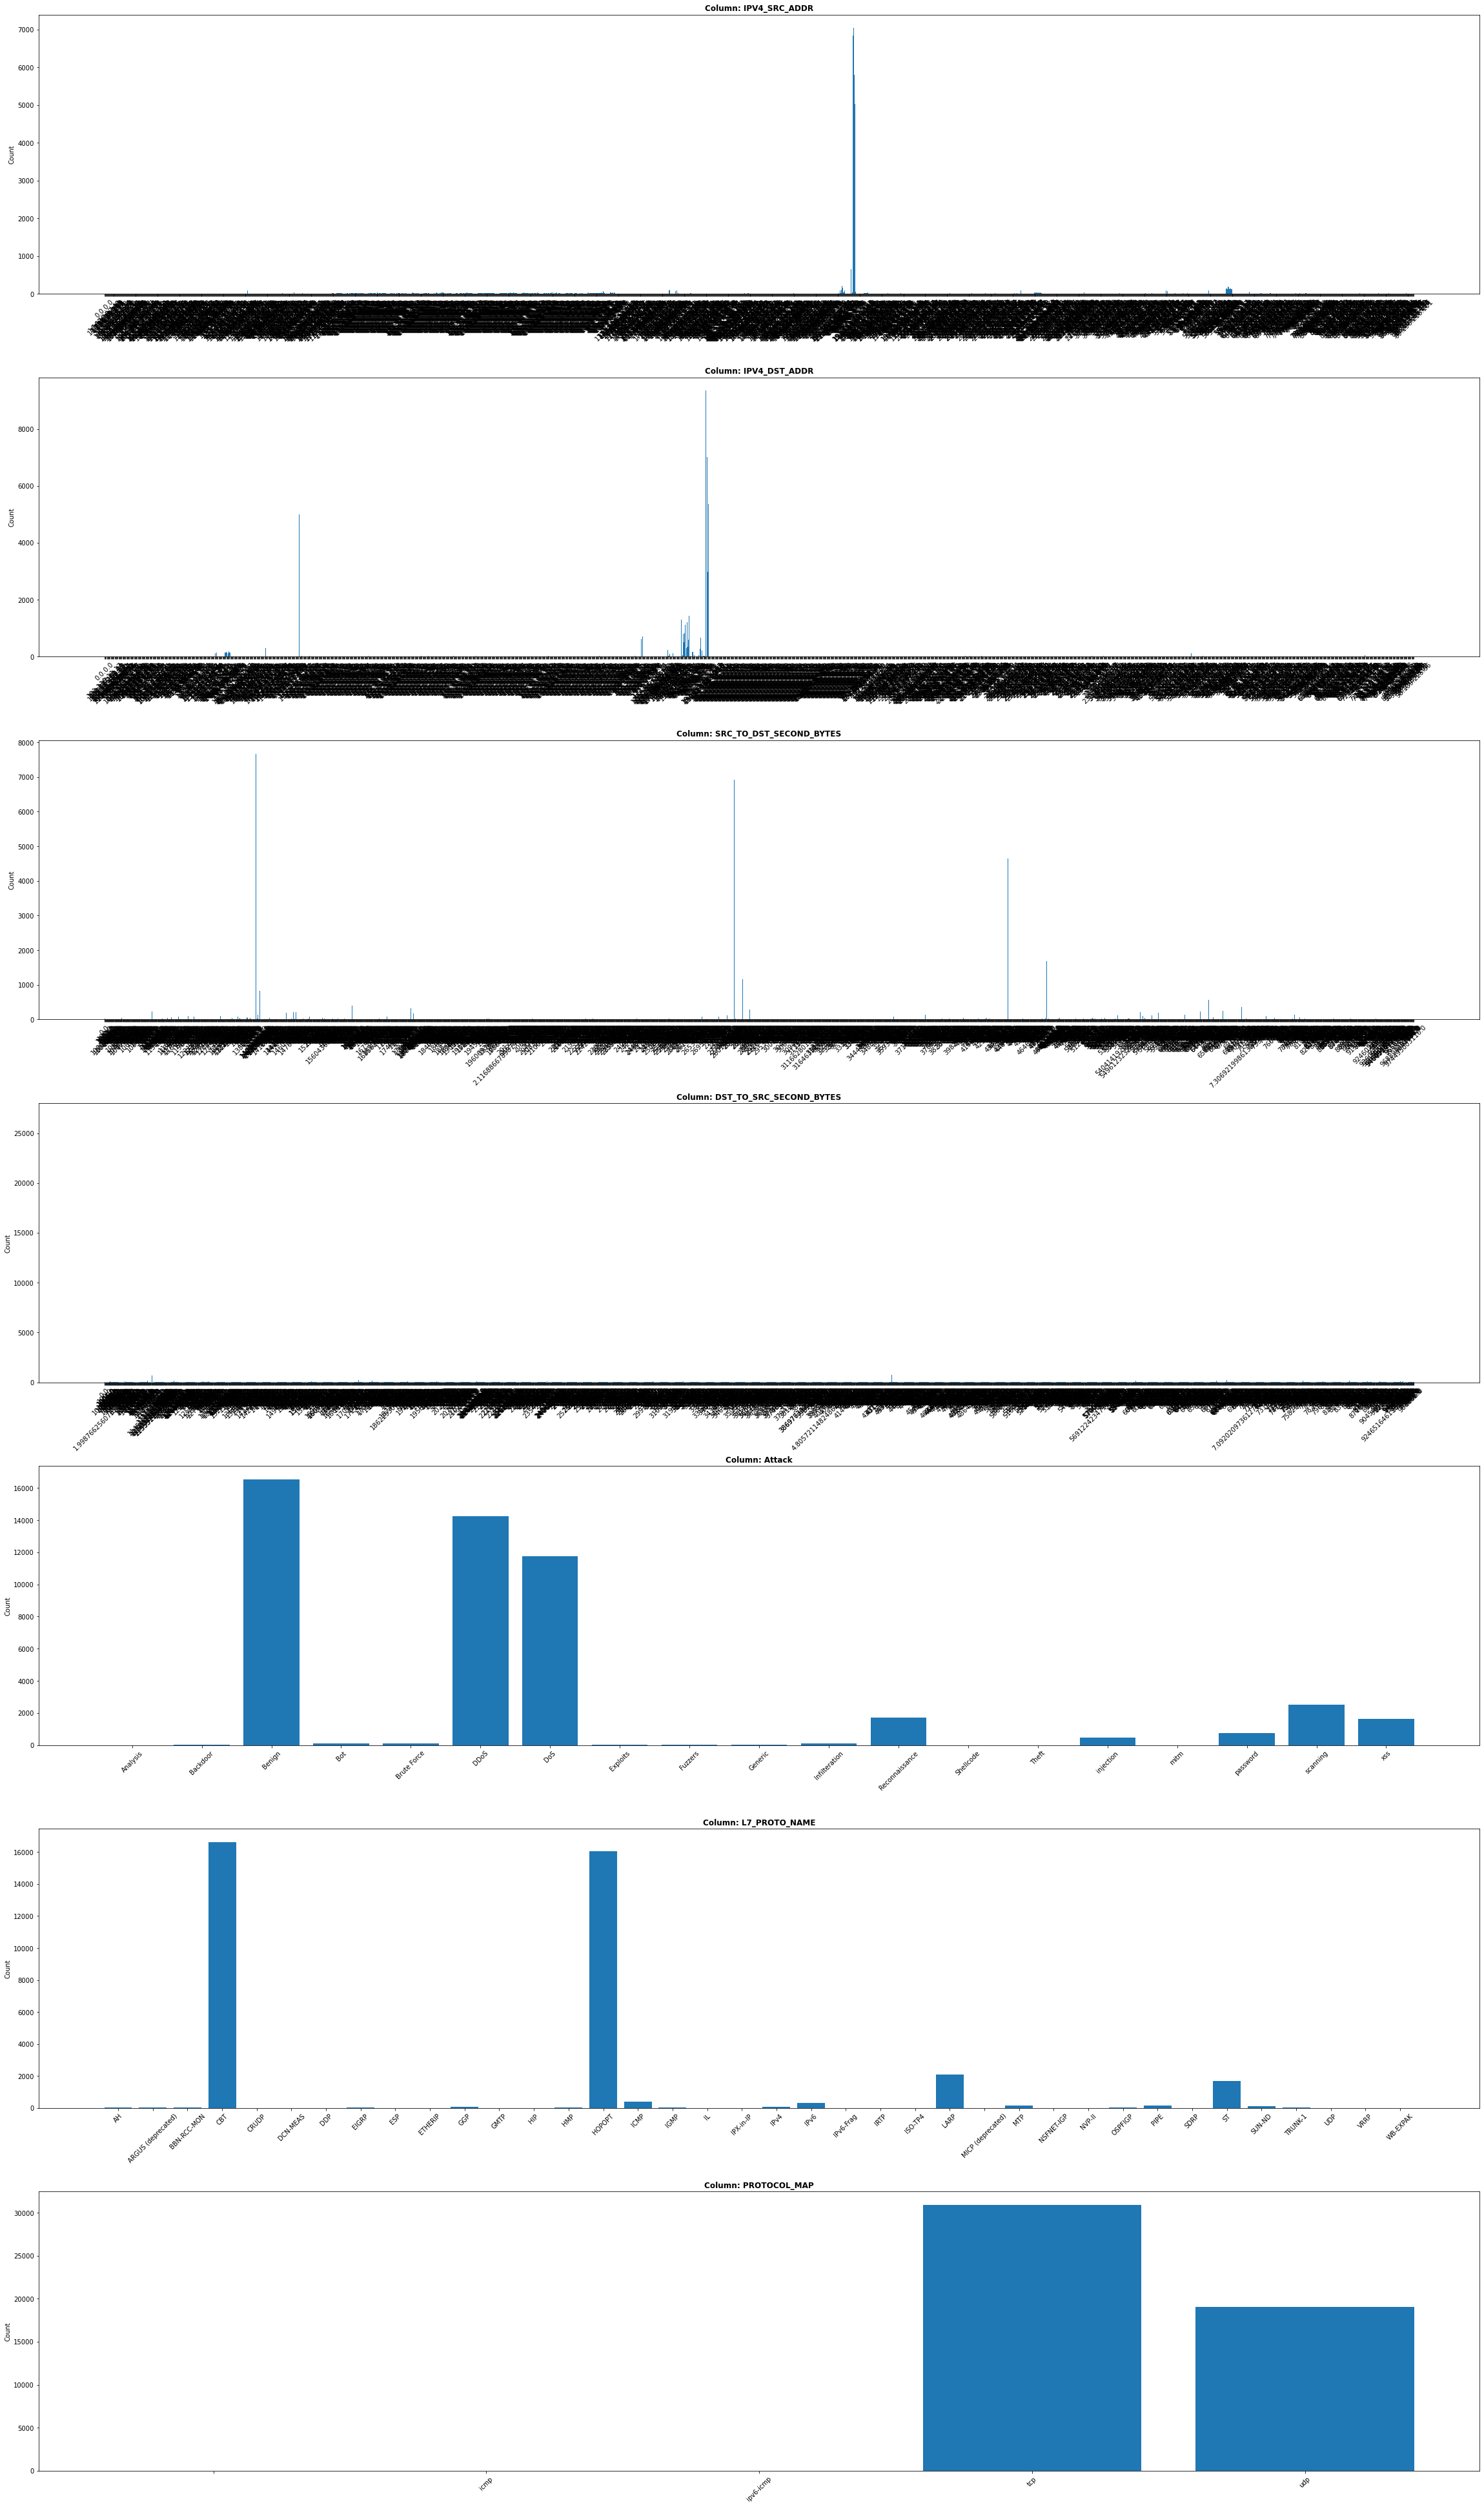

In [13]:
cols = ["IPV4_SRC_ADDR","IPV4_DST_ADDR","SRC_TO_DST_SECOND_BYTES","DST_TO_SRC_SECOND_BYTES","Attack","L7_PROTO_NAME","PROTOCOL_MAP"]
subset = datasets[0]
subsets = np.array_split(subset,10)
subset = subsets[0]

fig_nr_columns = 1
fig_nr_rows = 7
fig = plt.figure(1, figsize=[40,70])

for k in range(len(cols)):
    data_agg = subset.groupby(cols[k]).size().reset_index()
    x = data_agg[cols[k]]
    y = data_agg[0]
    ypos = np.arange(len(x))
    ax = fig.add_subplot(fig_nr_rows, fig_nr_columns, k+1)
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    ax.bar(ypos, y)
    ax.tick_params(axis='x', rotation=45)
    plt.xticks(ypos, x)
    plt.title("Column: {}".format(cols[k]), fontweight='bold')
    plt.ylabel("Count")

plt.show()

In [14]:
cols = ["IPV4_SRC_ADDR","IPV4_DST_ADDR","SRC_TO_DST_SECOND_BYTES","DST_TO_SRC_SECOND_BYTES","Attack","L7_PROTO_NAME","PROTOCOL_MAP"]

for k in range(len(cols)):
    print("Column: ",cols[k])
    value_counts = dt[cols[k]].value_counts()
    percentage_values = (value_counts / len(dt)) * 100
    filtered_values = percentage_values[percentage_values > 2]
    for value, percentage in filtered_values.items():
        print(f'    {value}: {percentage:.1f}%')
    count_less_than_two_percent = len(percentage_values[percentage_values <= 1])
    print(f'    Number of rows with less than two percent: {count_less_than_two_percent}')

Column:  IPV4_SRC_ADDR
    10.114.241.166: 50.2%
    10.114.225.212: 6.0%
    10.114.226.5: 4.6%
    10.114.225.206: 3.3%
    10.114.225.204: 2.8%
    10.114.225.205: 2.3%
    Number of rows with less than two percent: 42197
Column:  IPV4_DST_ADDR
    10.114.226.5: 8.7%
    10.114.224.65: 3.4%
    8.8.8.8: 3.3%
    10.114.224.120: 2.8%
    10.114.224.119: 2.7%
    10.114.224.114: 2.7%
    10.114.224.158: 2.7%
    10.114.224.83: 2.7%
    Number of rows with less than two percent: 154023
Column:  SRC_TO_DST_SECOND_BYTES
    44: 50.5%
    52: 3.1%
    Number of rows with less than two percent: 236844
Column:  DST_TO_SRC_SECOND_BYTES
    40: 43.4%
    ,: 20.7%
    Number of rows with less than two percent: 225319
Column:  Attack
    SYN Scan - aggressive: 49.9%
    Benign: 48.4%
    Number of rows with less than two percent: 21
Column:  L7_PROTO_NAME
    Unknown: 59.0%
    DNS: 8.9%
    TLS: 6.1%
    DNS.Google: 4.4%
    SSH: 2.7%
    ICMP: 2.5%
    Number of rows with less than two percen

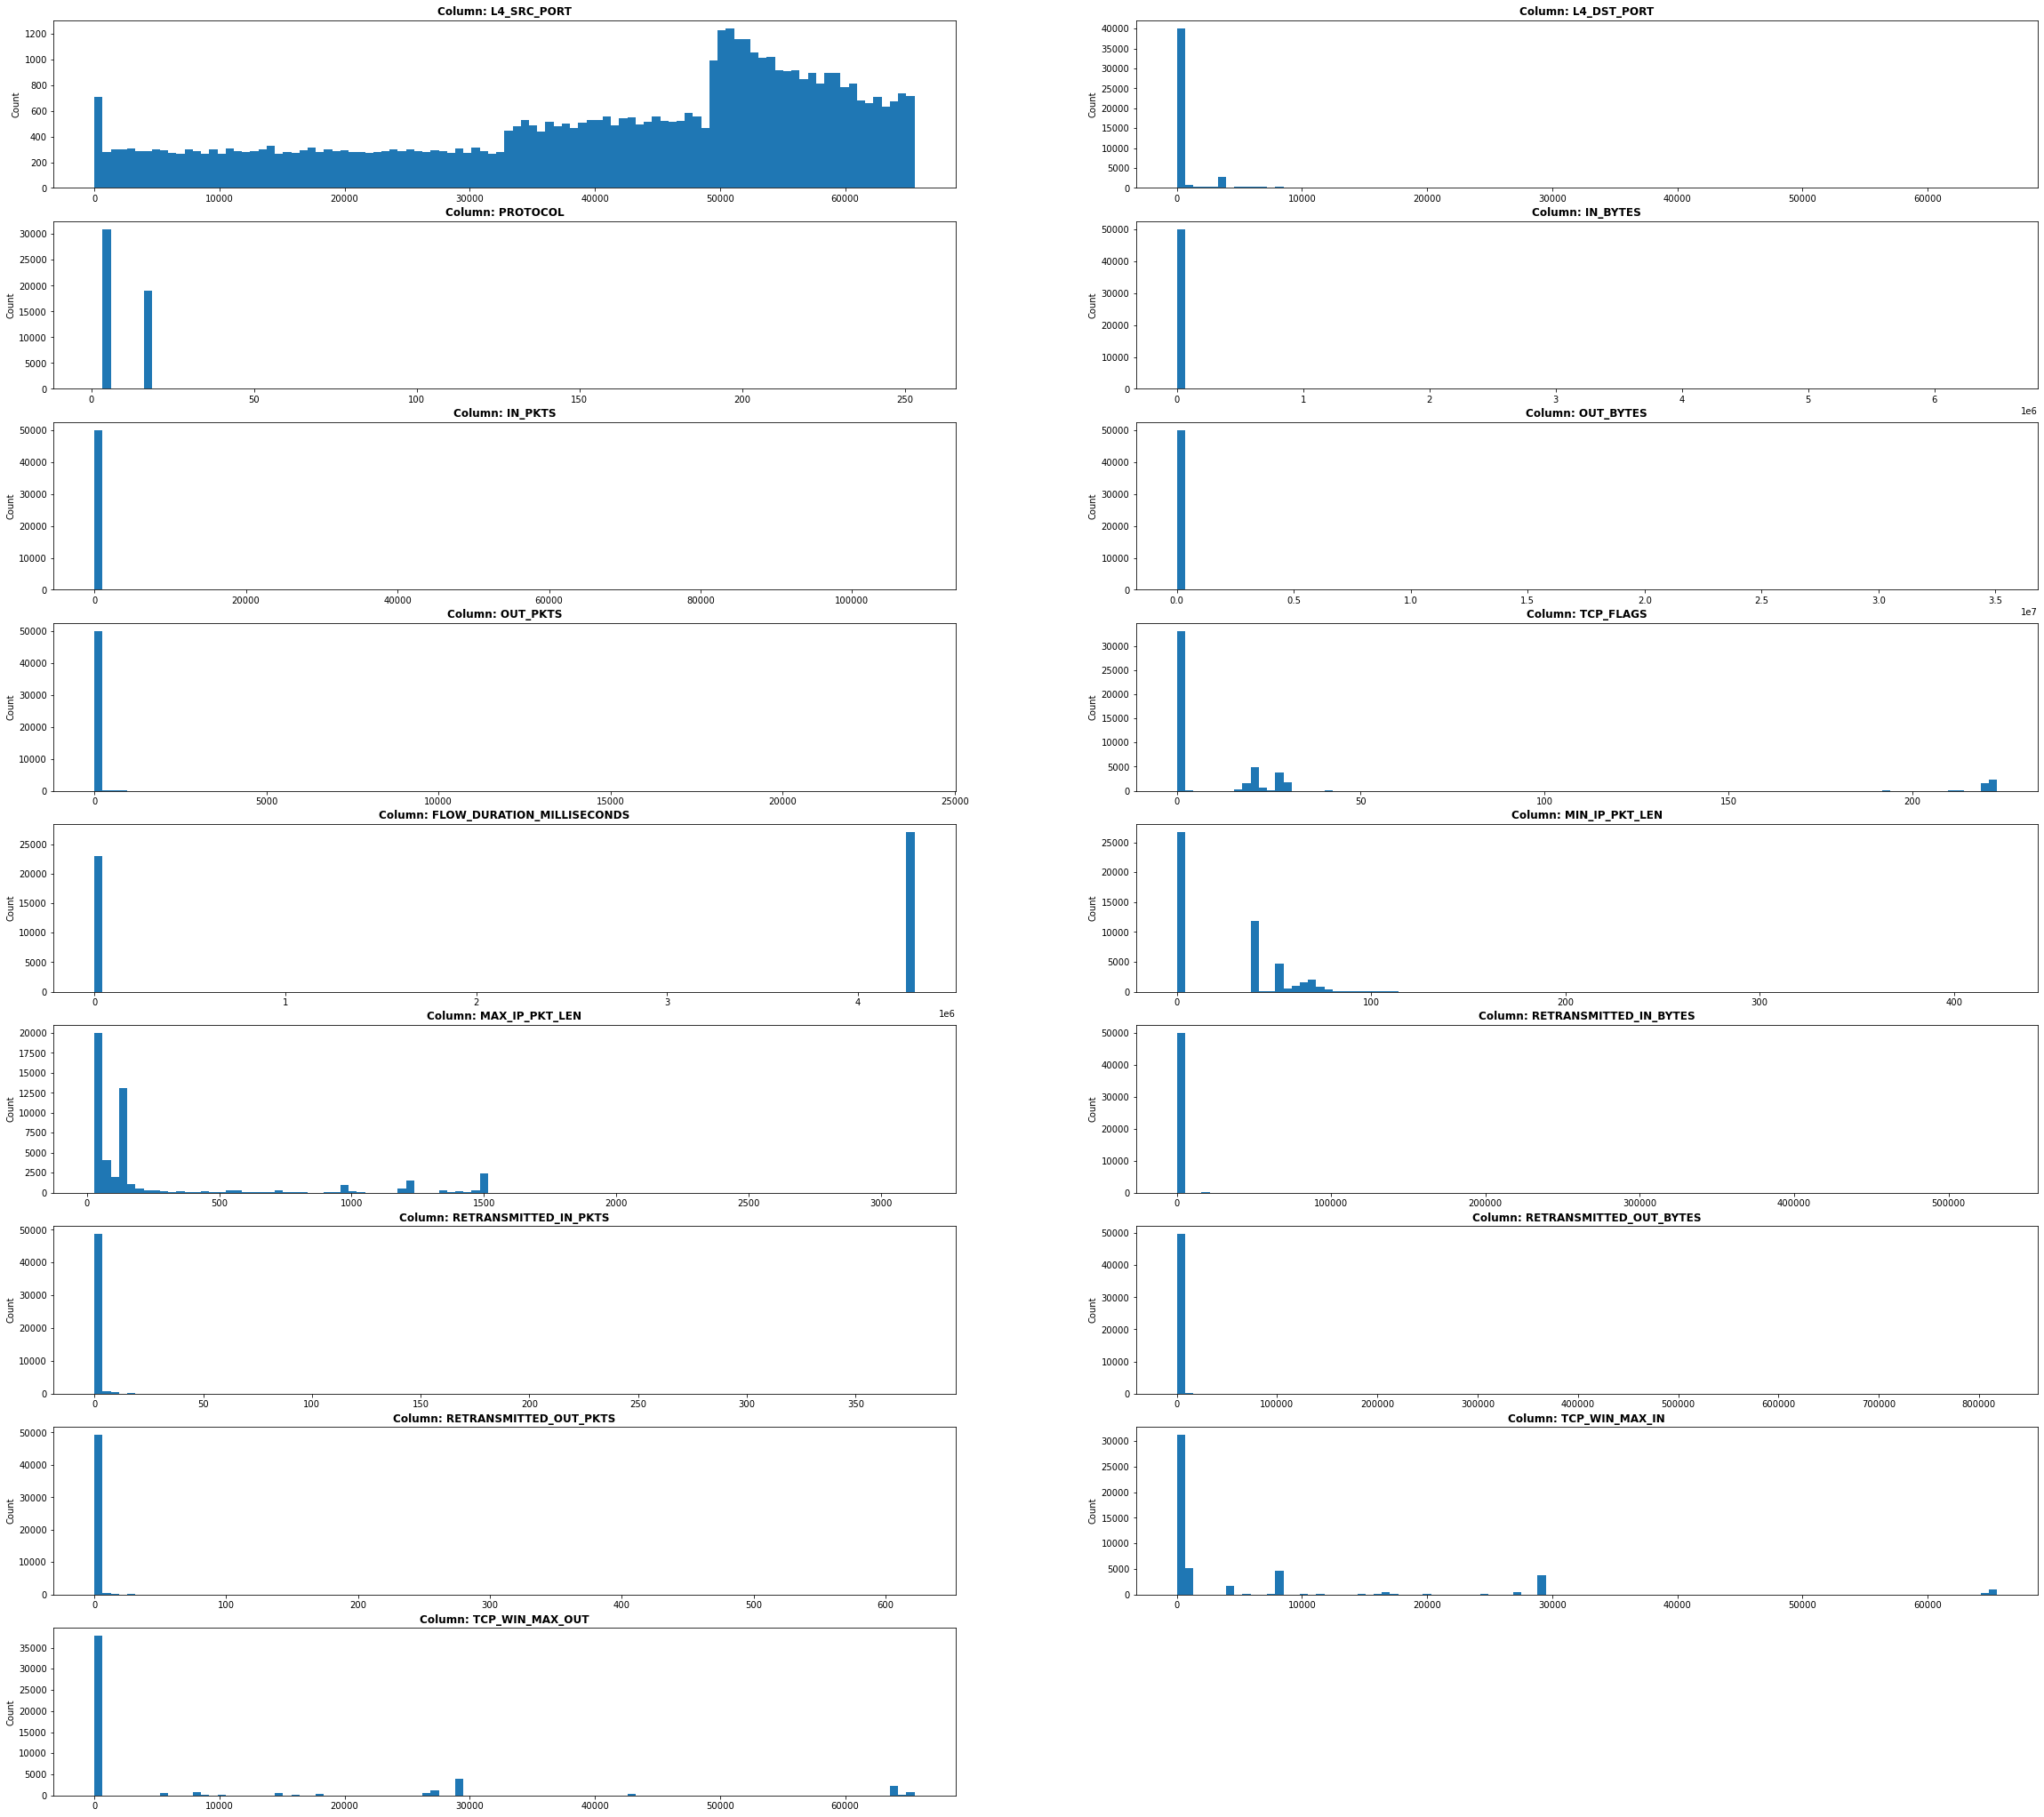

In [15]:
cols = ["L4_SRC_PORT","L4_DST_PORT","PROTOCOL","IN_BYTES","IN_PKTS","OUT_BYTES","OUT_PKTS","TCP_FLAGS","FLOW_DURATION_MILLISECONDS","MIN_IP_PKT_LEN","MAX_IP_PKT_LEN","RETRANSMITTED_IN_BYTES","RETRANSMITTED_IN_PKTS","RETRANSMITTED_OUT_BYTES","RETRANSMITTED_OUT_PKTS","TCP_WIN_MAX_IN","TCP_WIN_MAX_OUT"]
subset = datasets[0]
subsets = np.array_split(subset,10)
subset = subsets[0]

fig_nr_columns = 2
fig_nr_rows = 17
fig = plt.figure(1, figsize=[40,70])

for k in range(len(cols)):
    num_bins = 100
    ax = fig.add_subplot(fig_nr_rows, fig_nr_columns, k+1)
    ax.hist(subset[cols[k]], num_bins)
    plt.title("Column: {}".format(cols[k]), fontweight='bold')
    plt.ylabel("Count")

plt.show()

In [16]:
cols = ["L4_SRC_PORT","L4_DST_PORT","PROTOCOL","IN_BYTES","IN_PKTS","OUT_BYTES","OUT_PKTS","TCP_FLAGS","FLOW_DURATION_MILLISECONDS","MIN_IP_PKT_LEN","MAX_IP_PKT_LEN","RETRANSMITTED_IN_BYTES","RETRANSMITTED_IN_PKTS","RETRANSMITTED_OUT_BYTES","RETRANSMITTED_OUT_PKTS","TCP_WIN_MAX_IN","TCP_WIN_MAX_OUT"]

for k in range(len(cols)):
    print("Column: ",cols[k])
    value_counts = dt[cols[k]].value_counts()
    percentage_values = (value_counts / len(dt)) * 100
    filtered_values = percentage_values[percentage_values > 2]
    for value, percentage in filtered_values.items():
        print(f'    {value}: {percentage:.1f}%')
    count_less_than_two_percent = len(percentage_values[percentage_values <= 1])
    print(f'    Number of rows with less than two percent: {count_less_than_two_percent}')

Column:  L4_SRC_PORT
    49726: 13.1%
    49214: 9.2%
    49470: 9.2%
    49982: 6.6%
    48958: 5.2%
    49983: 3.9%
    0: 3.3%
    443: 2.3%
    Number of rows with less than two percent: 64944
Column:  L4_DST_PORT
    53: 17.1%
    443: 9.7%
    0: 3.3%
    22: 2.6%
    57782: 2.3%
    Number of rows with less than two percent: 65528
Column:  PROTOCOL
    6: 73.7%
    17: 23.0%
    1: 3.3%
    Number of rows with less than two percent: 20
Column:  IN_BYTES
    44: 50.7%
    52: 3.1%
    84: 2.0%
    Number of rows with less than two percent: 38317
Column:  IN_PKTS
    1: 78.0%
    2: 8.3%
    3: 2.4%
    Number of rows with less than two percent: 5232
Column:  OUT_BYTES
    40: 43.7%
    0: 23.0%
    Number of rows with less than two percent: 45993
Column:  OUT_PKTS
    1: 59.8%
    0: 23.0%
    2: 5.9%
    Number of rows with less than two percent: 5489
Column:  TCP_FLAGS
    22: 42.7%
    0: 26.3%
    2: 14.7%
    27: 3.7%
    24: 3.1%
    26: 2.3%
    Number of rows with less th

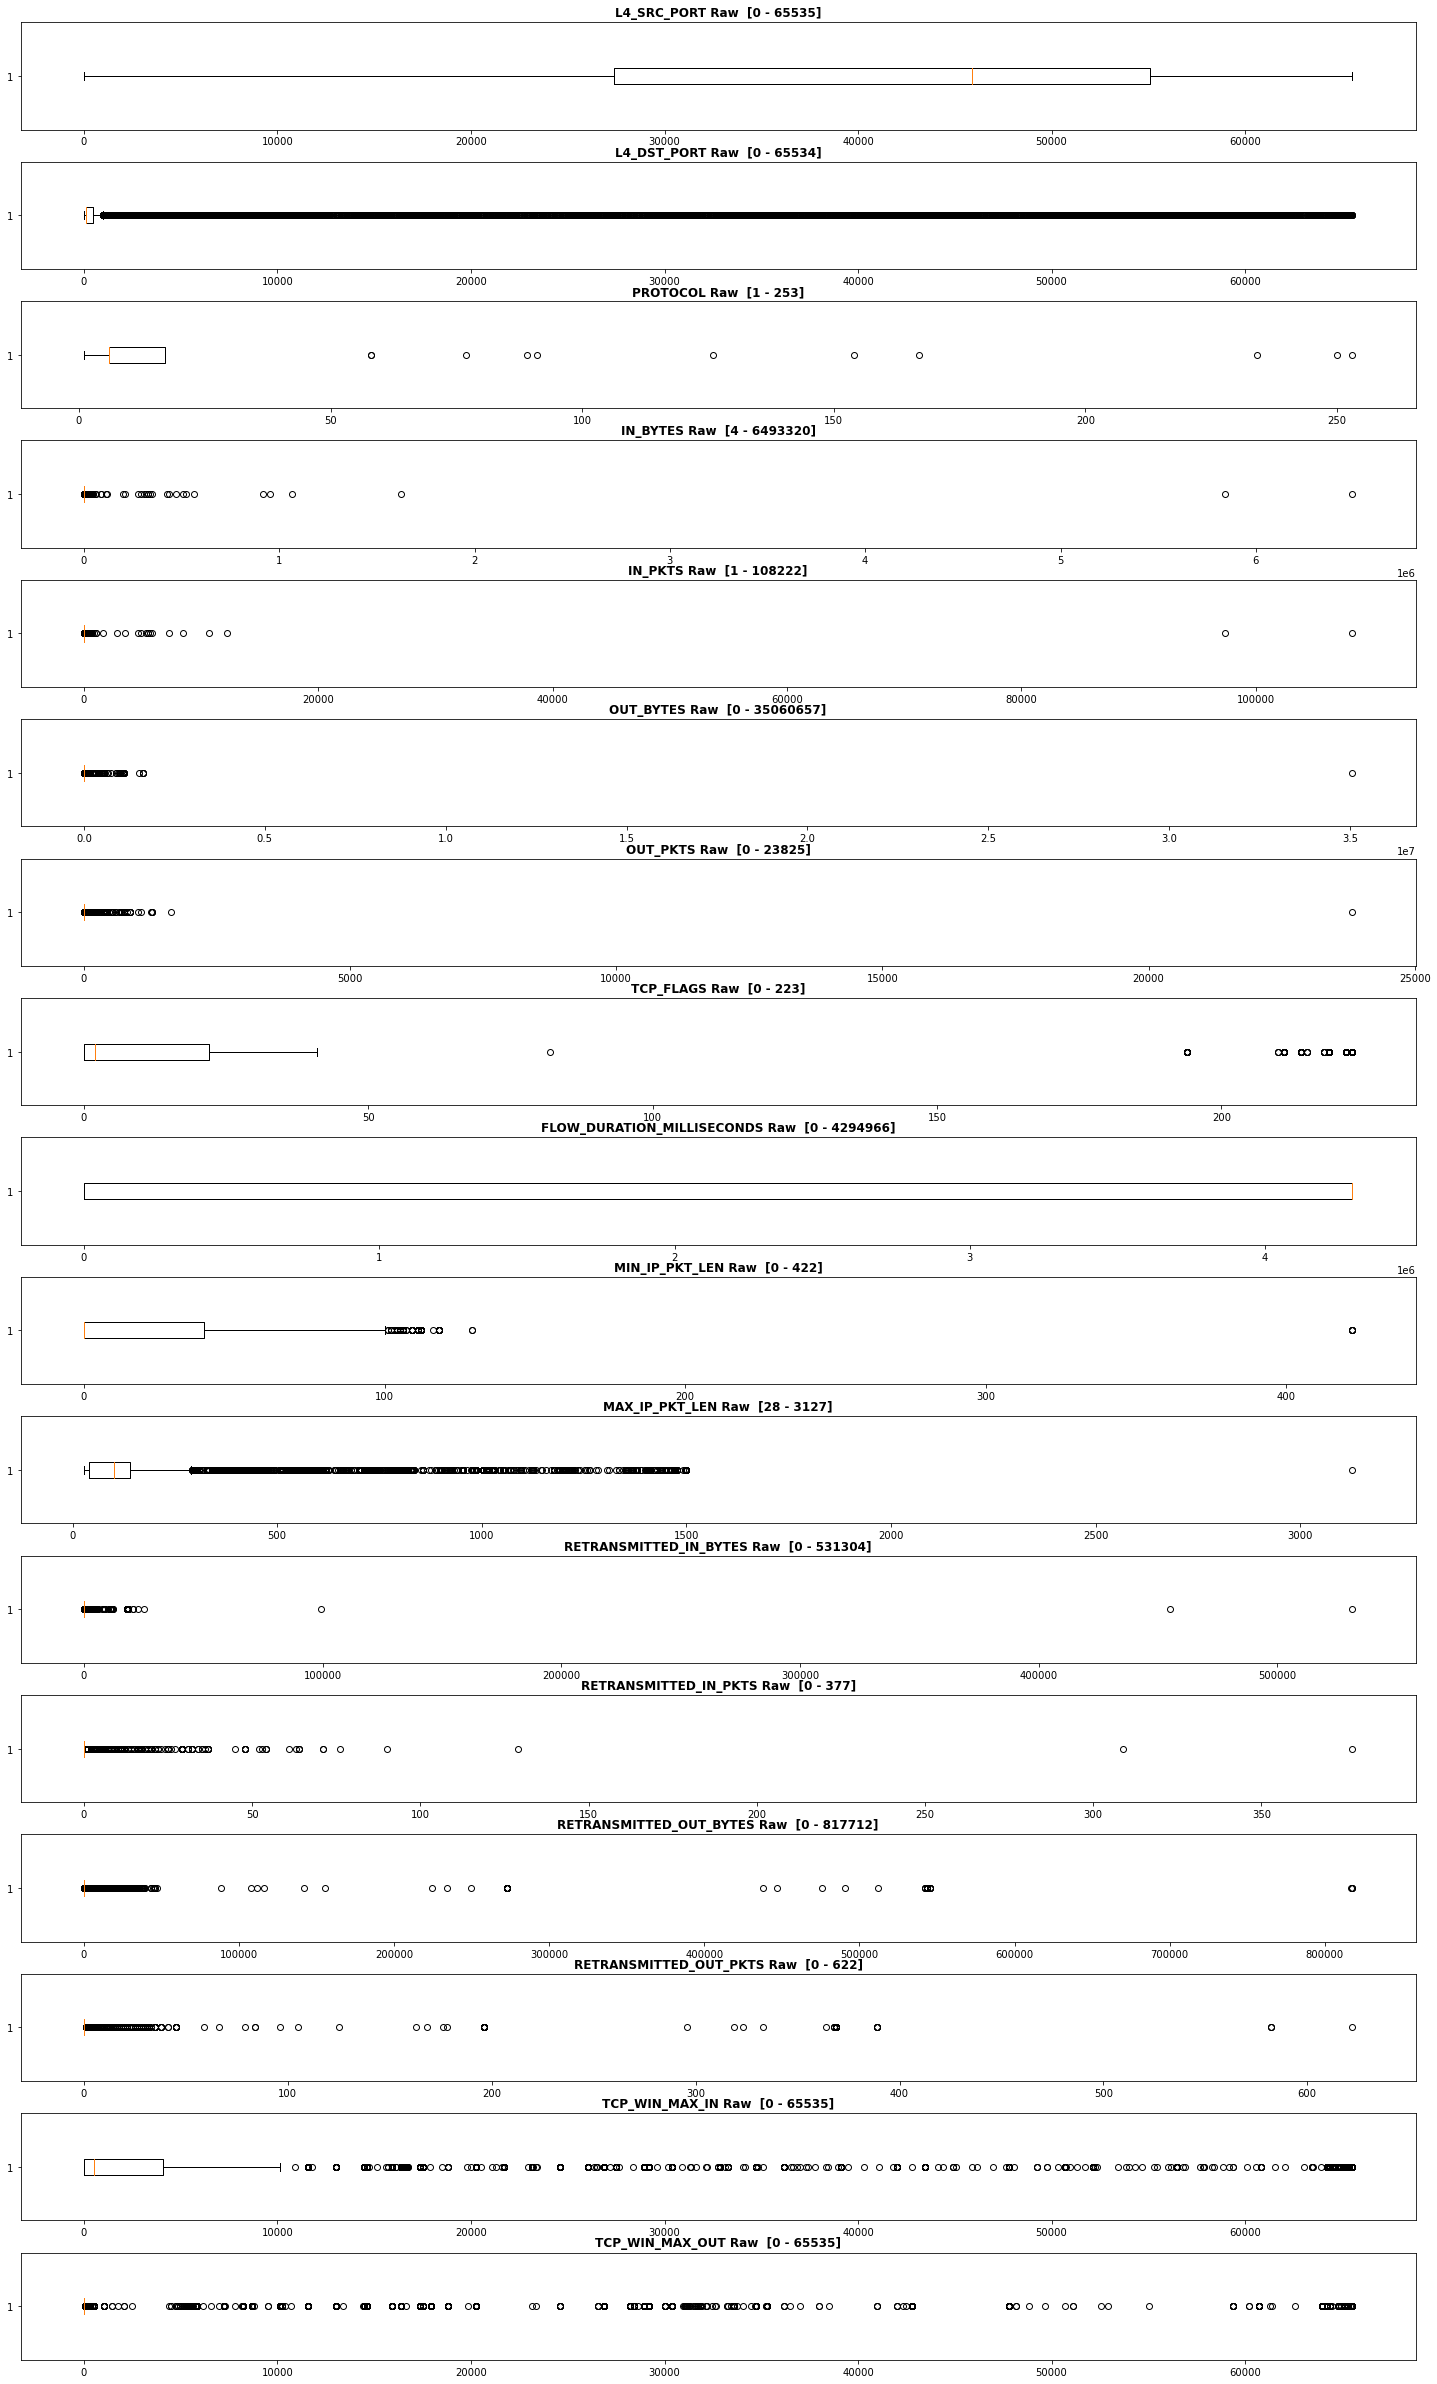

In [17]:
cols = ["L4_SRC_PORT","L4_DST_PORT","PROTOCOL","IN_BYTES","IN_PKTS","OUT_BYTES","OUT_PKTS","TCP_FLAGS","FLOW_DURATION_MILLISECONDS","MIN_IP_PKT_LEN","MAX_IP_PKT_LEN","RETRANSMITTED_IN_BYTES","RETRANSMITTED_IN_PKTS","RETRANSMITTED_OUT_BYTES","RETRANSMITTED_OUT_PKTS","TCP_WIN_MAX_IN","TCP_WIN_MAX_OUT"]
fig_nr_columns = 1
fig_nr_rows = 17
fig = plt.figure(1, figsize=[25,43])

subset = datasets[0]
subsets = np.array_split(subset,10)
subset = subsets[0]

for k in range(len(cols)):
    num_bins = 100
    plt.subplots_adjust(hspace=0.3, wspace=0.1)
    ax = fig.add_subplot(fig_nr_rows, fig_nr_columns, k+1)
    yvalues = np.array(subset[cols[k]].dropna())
    ax.boxplot(yvalues, vert=False)
    plt.title("{} Raw  [{} - {}]".format(cols[k], yvalues.min(), yvalues.max()), fontweight='bold')
plt.show()

<AxesSubplot:xlabel='IN_BYTES'>

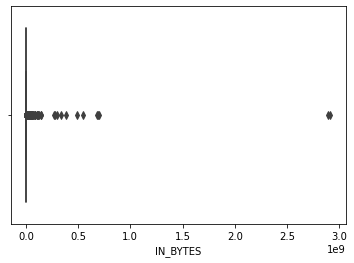

In [24]:
sns.boxplot(x=dt.IN_BYTES)

<AxesSubplot:xlabel='OUT_BYTES', ylabel='Attack'>

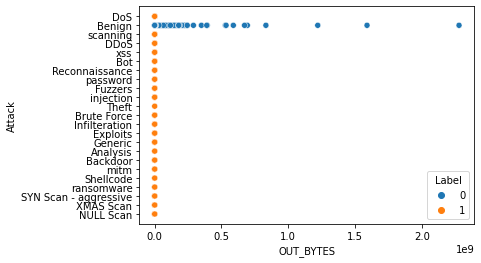

In [25]:
sns.scatterplot(data=dt, x="OUT_BYTES", y="Attack", hue="Label")

<AxesSubplot:xlabel='PROTOCOL_MAP', ylabel='Attack'>

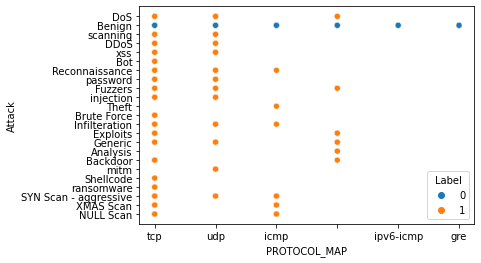

In [26]:
sns.scatterplot(data=dt, x="PROTOCOL_MAP", y="Attack", hue="Label")

<AxesSubplot:xlabel='OUT_BYTES'>

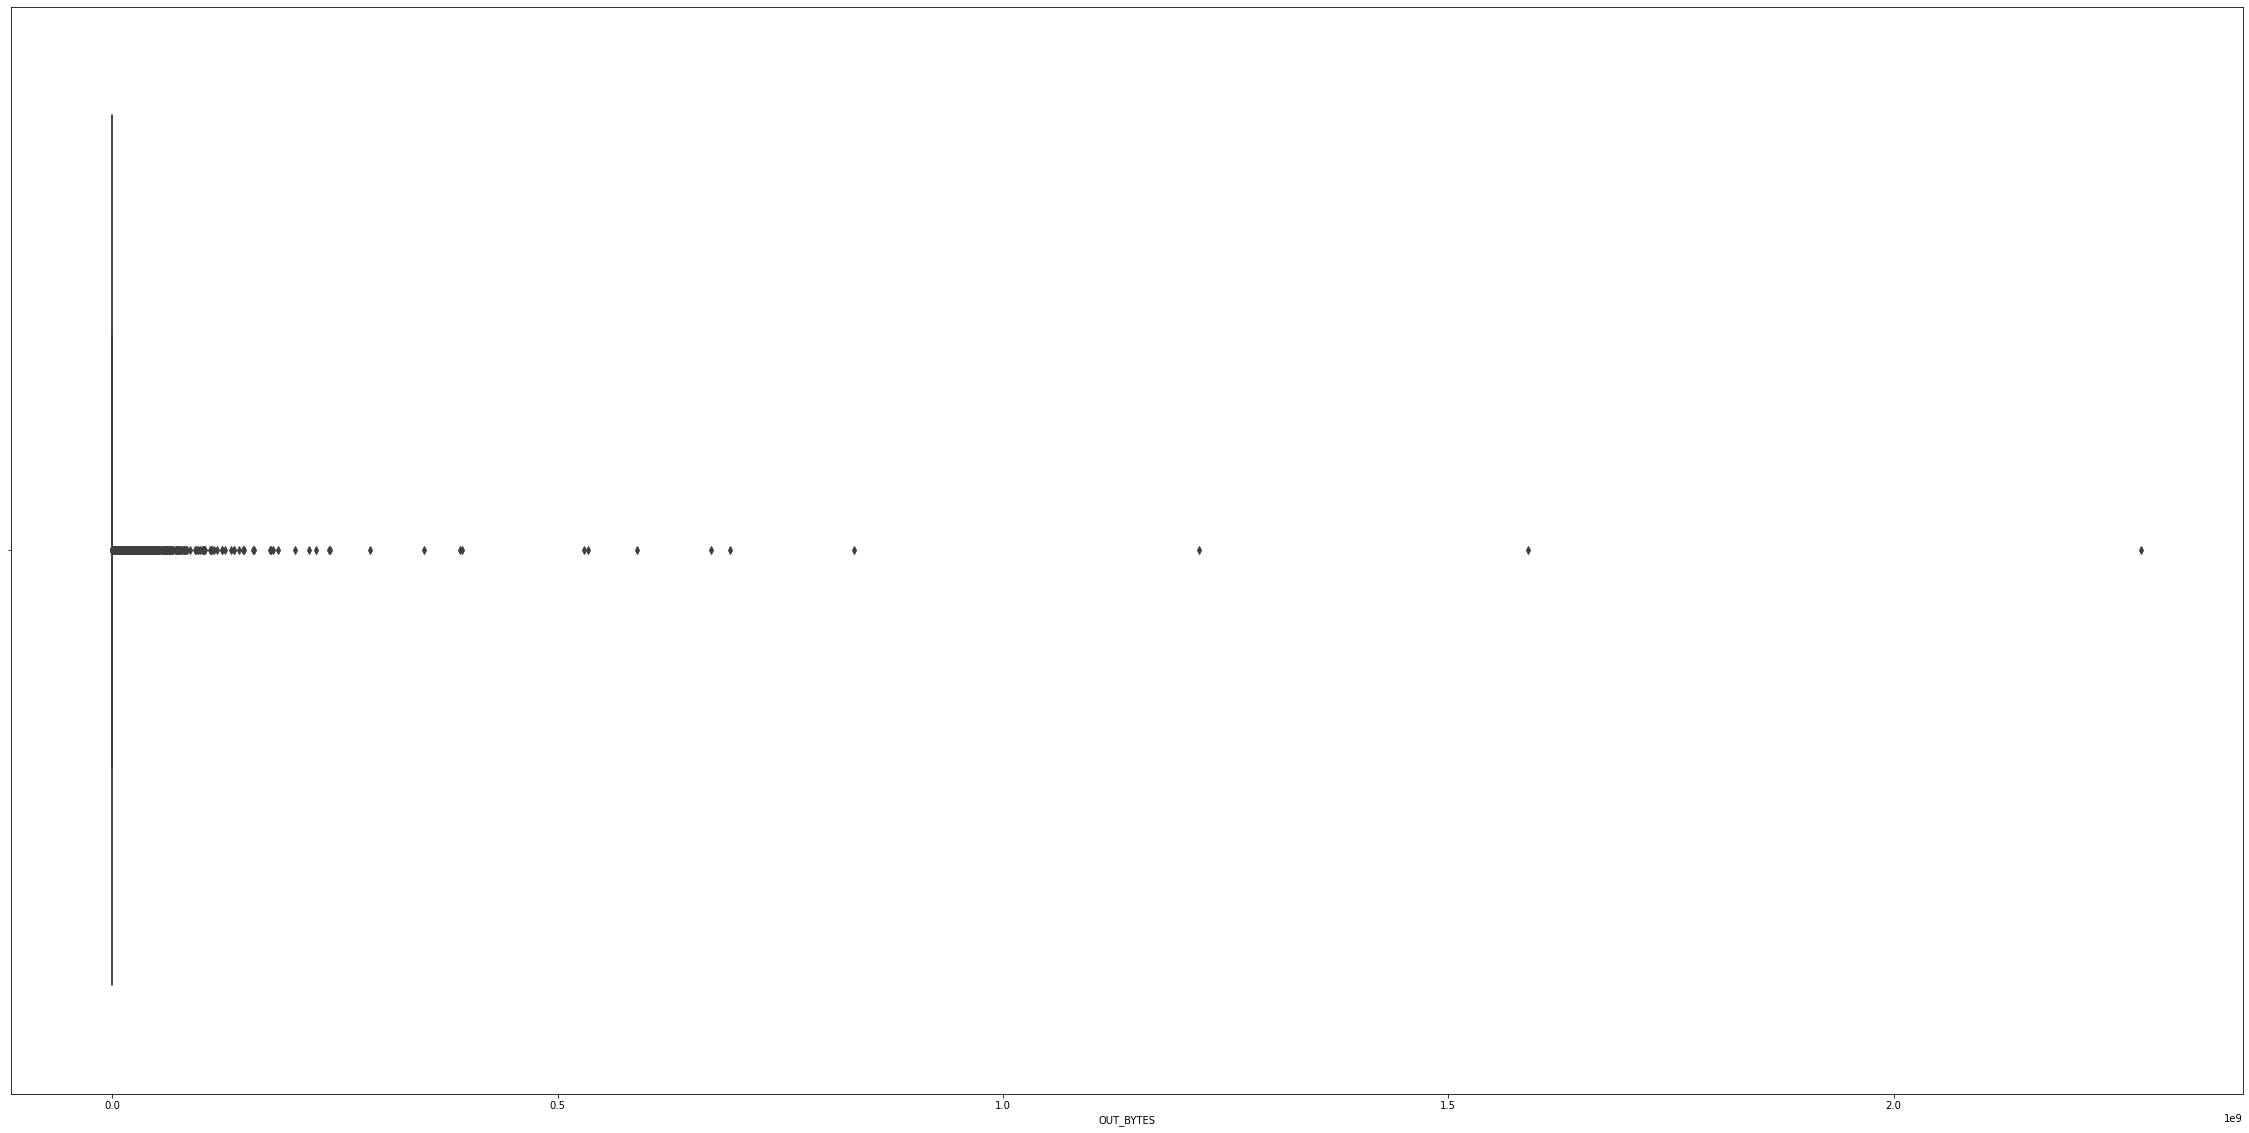

In [27]:
fig, ax = plt.subplots(figsize=(40, 20))

sns.boxplot(data=dt, x="OUT_BYTES", ax=ax)